Steps of approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

# 1. Problem Definition
> We want to predict whether the person has heart disease or not based on the given data

# 2. Data
> Original data from the Cleavland data from UCI Machine Learning Repository

# 3. Evaluation

In [1]:
# Import all tools

# Import EDA and Plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve


## Load Data

In [2]:
df = pd.read_csv('heart_disease_data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
1,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
2,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1
3,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
4,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1


In [3]:
df.shape

(606, 14)

## Data Exploration or EDA
> The goal here is to find out more about the data and become a subject expert on the dataset you're working with

1. What questions are you trying to solve?
2. What kind of data do we have and how do we have treat different types?
3. What's missing from the data and how to deal with it?
4. Where are the outliers and why should you care them?
5. How can you add, change or remove features to get more out of the data?

In [4]:
df['target'].value_counts()

1    330
0    276
Name: target, dtype: int64

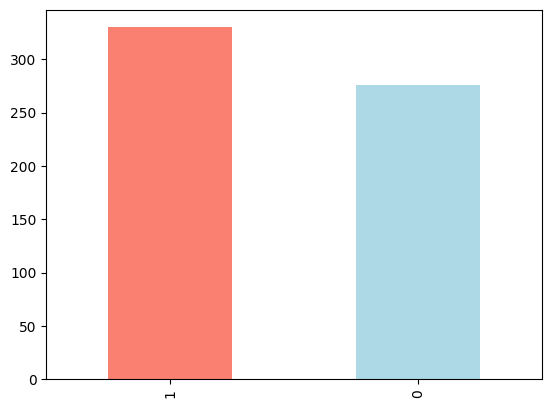

In [5]:
df['target'].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       606 non-null    int64  
 1   sex       606 non-null    int64  
 2   cp        606 non-null    int64  
 3   trestbps  606 non-null    int64  
 4   chol      606 non-null    int64  
 5   fbs       606 non-null    int64  
 6   restecg   606 non-null    int64  
 7   thalach   606 non-null    int64  
 8   exang     606 non-null    int64  
 9   oldpeak   606 non-null    float64
 10  slope     606 non-null    int64  
 11  ca        606 non-null    int64  
 12  thal      606 non-null    int64  
 13  target    606 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 66.4 KB


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.074592,0.465626,1.031199,17.523642,51.787898,0.355903,0.525425,22.886223,0.469406,1.160115,0.615717,1.021761,0.611770,0.498422
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to sex

In [9]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,48,228
1,144,186


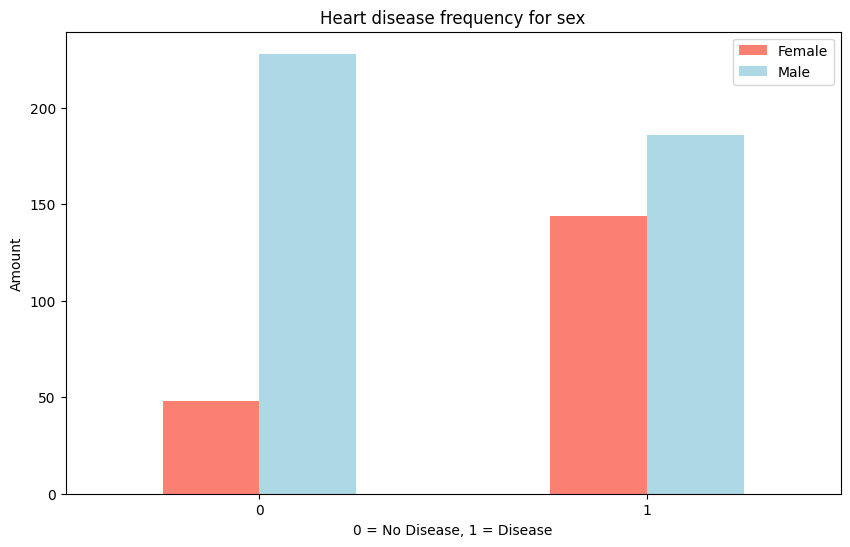

In [10]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["salmon", "lightblue"])
plt.title("Heart disease frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Age vs Max HEart Rate for Heart Disease

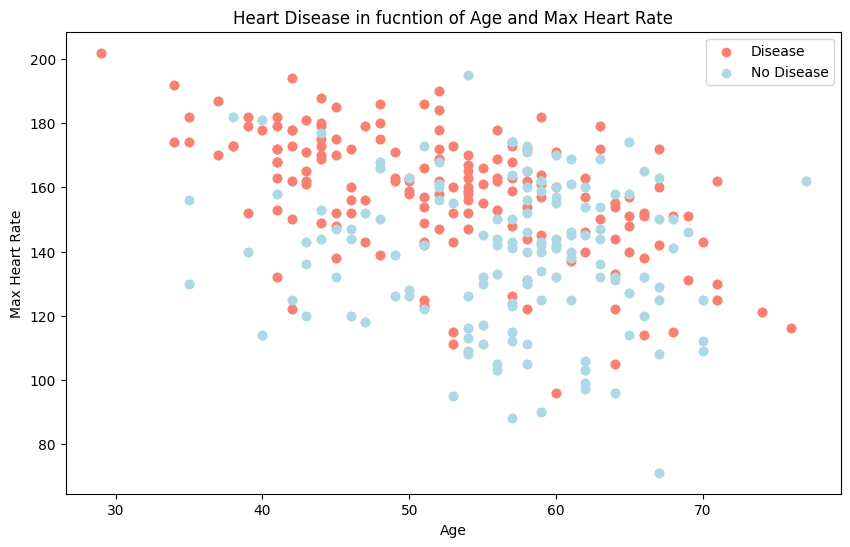

In [11]:
# create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon");

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");

plt.title("Heart Disease in fucntion of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

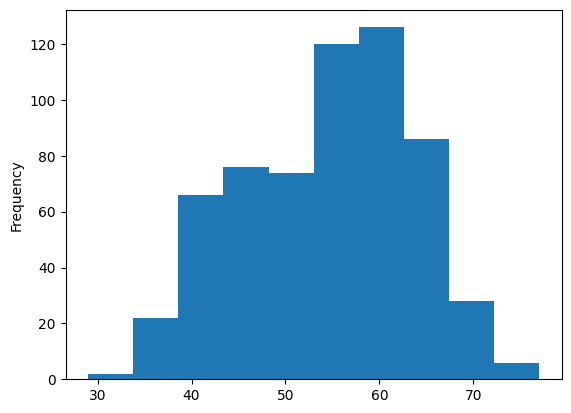

In [12]:
# Check the age distribution with histogram
df.age.plot.hist();

### Chest pain vs Target Column

In [13]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,208,78
1,18,82
2,36,138
3,14,32


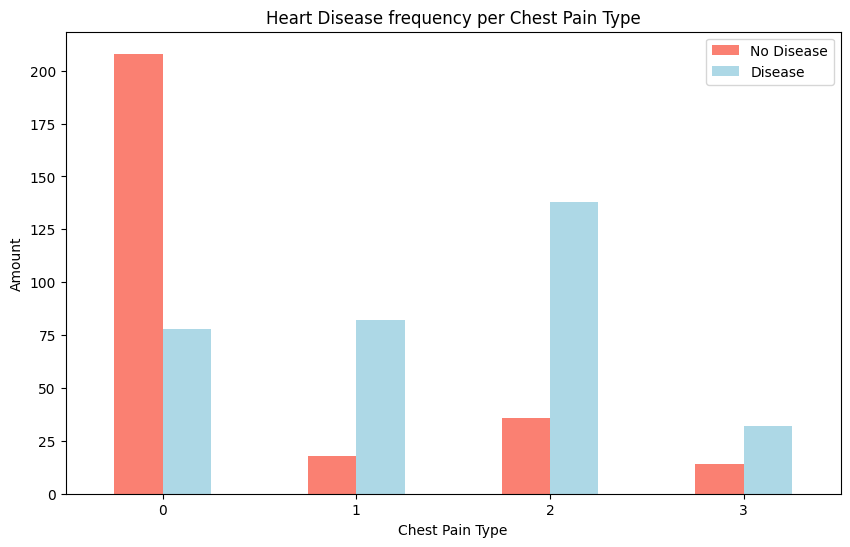

In [14]:
# Make the crosstab visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon", "lightblue"])
plt.title("Heart Disease frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

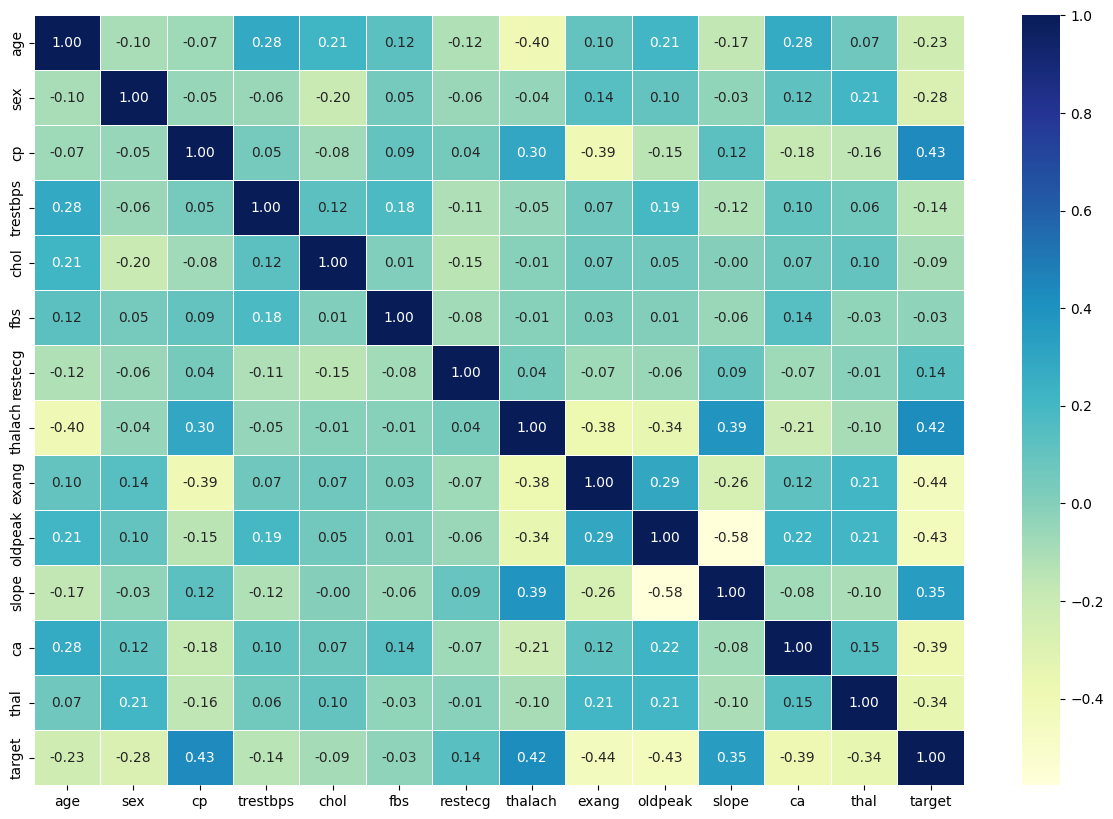

In [15]:
# Make a correlation matrix and make it visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");


# 5. Modelling

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
1,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
2,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1
3,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
4,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1


In [17]:
# Split the Data
X = df.drop("target", axis=1)
y = df["target"]

In [18]:
# Split the data into train test sets
np.random.seed(42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### After splitting the dataset into training and test set, Now it's time to build machine learning model

We're going to try 3 different machine learning models:
1. Logistic Regression
2. K Nearest Neighbors Classification
3. Random Forest Classifier

In [19]:
# Put models in a dictionary
models = {"Logistic Regression" : LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit_learn machine learning models.
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test = testing labels
    """
    # set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [20]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)    
model_scores

C:\Users\sathwik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8278688524590164,
 'KNN': 0.7131147540983607,
 'Random Forest': 0.9508196721311475}

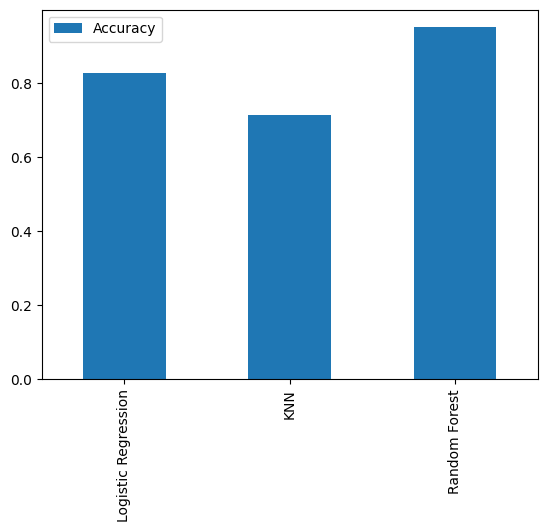

In [21]:
model_compare = pd.DataFrame(model_scores, index = ["Accuracy"])
model_compare.T.plot.bar();

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune :
* LogisticRegression()
* RandomForestClassifier()

In [22]:
# Create a hyperparameter grid for LogisticRegression
Log_reg_grid = {"C" : np.logspace(-4, 4, 20),
                "solver" : ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
           "max_depth" : [None, 3, 5 ,10],
           "min_samples_split" : np.arange(2, 20, 2),
           "min_samples_leaf" : np.arange(1, 20, 2)}


In [23]:
# Tune Logistic regression

np.random.seed(42)

# Setup random hyperparamter search for logisitic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=Log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [24]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [25]:
rs_log_reg.score(X_test, y_test)

0.8114754098360656

In [26]:
rf_clf = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rf_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True)

rf_clf.fit(X_train, y_train)
                    

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [27]:
rf_clf.best_params_

{'n_estimators': 60,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': None}

In [28]:
rf_clf.score(X_test, y_test)

0.8524590163934426

## Hyperparameter tuning with GridSearchCV

In [29]:
# Create a hyperparameter grid for LogisticRegression
Log_reg_grid = {"C" : np.logspace(-4, 4, 20),
                "solver" : ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
           "max_depth" : [None, 3, 5 ,10],
           "min_samples_split" : np.arange(2, 20, 2),
           "min_samples_leaf" : np.arange(1, 20, 2)}

In [30]:
log_reg1 = GridSearchCV(LogisticRegression(),
                        param_grid= Log_reg_grid,
                        cv=5,
                        verbose=True)
                        
log_reg1.fit(X_train, y_train)                

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [31]:
log_reg1.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [32]:
log_reg1.score(X_test, y_test)

0.8114754098360656

## Evaluating the machine learning classifier beyond accuracy
* ROC and AOC score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible

In [33]:
# Make predictions
y_preds = log_reg1.predict(X_test)

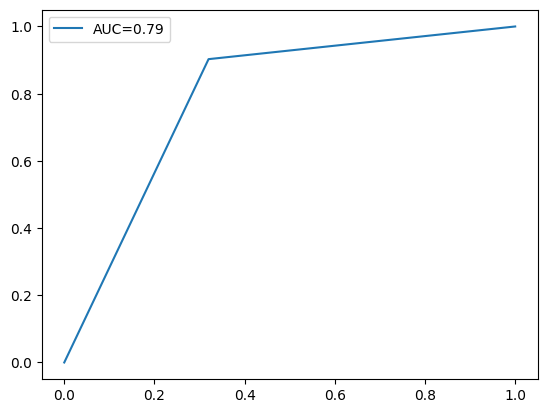

In [34]:
 # Plot ROC curve and calculate AUC metric
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_preds)
auc = roc_auc_score(y_test, y_preds)
plt.plot(fpr, tpr, label=f'AUC={auc:.2f}')
plt.legend()
plt.show()

In [35]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[34 16]
 [ 7 65]]


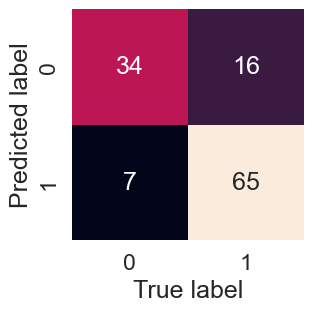

In [36]:
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("True label") # predictions go on the x-axis
    plt.ylabel("Predicted label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

In [37]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75        50
           1       0.80      0.90      0.85        72

    accuracy                           0.81       122
   macro avg       0.82      0.79      0.80       122
weighted avg       0.81      0.81      0.81       122



## Calculate evaluation metrics using cross validation
We will calculate precision, recall, f1 score, of our model using cross validation by using cross_val_score()

In [38]:
# Check the best hyperparameters
log_reg1.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [39]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.08858667904100823, solver='liblinear')

In [40]:
# Cross validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.86065574, 0.85950413, 0.81818182, 0.87603306, 0.81818182])

In [41]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8465113128302398

In [42]:
# Cross validated precision
cv_pre = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_pre = np.mean(cv_pre)
cv_pre

0.8145028004284939

In [43]:
# Cross validated recall
cv_rec = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_rec = np.mean(cv_rec)
cv_rec

0.9303030303030303

In [44]:
# Cross validated f1 score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8684002098170447

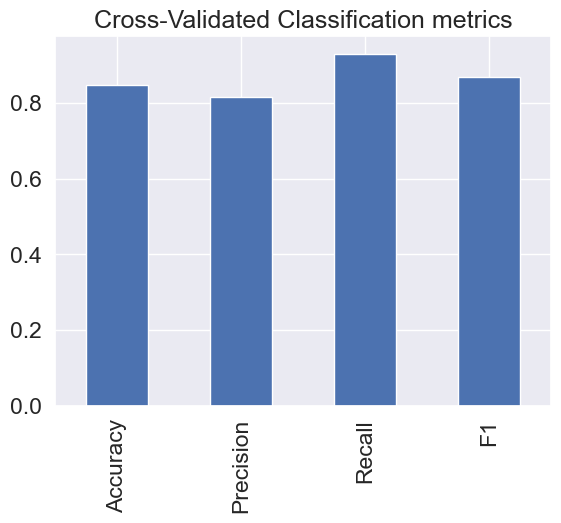

In [45]:
# Visualize the cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                           "Precision" : cv_pre,
                           "Recall" : cv_rec,
                           "F1" : cv_f1},
                          index=[0]
                         )
cv_metrics.T.plot.bar(title="Cross-Validated Classification metrics",
                      legend = False,);

### Feature Importance

Feature importance is another as asking, "which features have contributed most to the outcomes and how did they contribute?"

In [46]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.08858667904100823, solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.08858667904100823, solver='liblinear')

In [47]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
1,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
2,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1
3,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
4,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1


In [48]:
# Check coef_
clf.coef_

array([[ 0.00283362, -0.84295232,  0.70021112, -0.01578798, -0.00377957,
        -0.07381909,  0.29762674,  0.0306927 , -0.55221384, -0.38392655,
         0.41555659, -0.62455562, -0.62445662]])

In [49]:
# MAtch coef_ of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.002833616233526854,
 'sex': -0.842952323203339,
 'cp': 0.7002111151691488,
 'trestbps': -0.01578798280520614,
 'chol': -0.0037795749451666485,
 'fbs': -0.07381909392903162,
 'restecg': 0.29762673508617393,
 'thalach': 0.030692701380398067,
 'exang': -0.5522138367366628,
 'oldpeak': -0.3839265476949064,
 'slope': 0.415556587347437,
 'ca': -0.624555620328179,
 'thal': -0.6244566197818556}

<AxesSubplot: title={'center': 'Feature Importance'}>

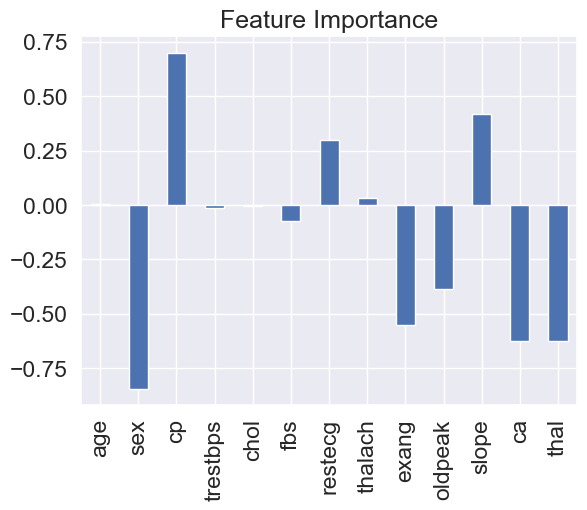

In [50]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

## 6. Experimentation

If you haven't hit your evaluation metric yet... ask
* Could you collect more data
* Could you try a better model like CatBoost or XGBoost?
* Could you imporve current model?
* If your model is good enough how would you export it and share it with other?